In [5]:
import pandas as pd
import numpy as np
import os
import glob

In [2]:
data = pd.read_csv('Data2.csv')

In [3]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   alloy                199 non-null    object 
 1   processing_type      199 non-null    object 
 2   processing_stage     199 non-null    int64  
 3   number_of_cells      199 non-null    int64  
 4   neighbor_order       199 non-null    int64  
 5   number_of_disangles  199 non-null    int64  
 6   p                    199 non-null    float64
 7   H                    199 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 12.6+ KB


,alloy,processing_type,processing_stage,number_of_cells,neighbor_order,number_of_disangles,p,H
0,Cu_01Cr_01Zr,ECAP,1,992,1,2858,0.235,0.319
1,Cu_01Cr_01Zr,ECAP,1,992,2,6598,0.180,0.256
2,Cu_01Cr_01Zr,ECAP,1,992,3,11163,0.143,0.222
3,Cu_01Cr_01Zr,ECAP,1,992,4,15992,0.132,0.204
4,Cu_01Cr_01Zr,ECAP,1,992,5,20647,0.112,0.183


In [9]:
data['id'] = data['alloy'] + '_pass' + data['processing_stage'].astype(str) + '_' + data['neighbor_order'].astype(str)

In [8]:
data.groupby(['alloy', 'processing_stage']).count()

processing_type  number_of_cells  \
alloy             processing_stage                                     
Cu_01Cr_01Zr      1                              20               20   
                  4                              20               20   
                  8                              20               20   
Cu_01Cr_01Zr_005Y 1                               7                7   
                  4                              20               20   
                  8                              20               20   
Cu_03Cr_05Zr      1                               8                8   
                  4                              20               20   
Cu_Mg             1                              20               20   
                  2                              20               20   
Random            1                               8                8   
                  4                               8                8   
                  8                               8                8   

                                    neighbor_order  number_of_disangles   p  \
alloy             processing_stage                                            
Cu_01Cr_01Zr      1                             20                   20  20   
                  4                             20                   20  20   
                  8                             20                   20  20   
Cu_01Cr_01Zr_005Y 1                              7                    7   7   
                  4                             20                   20  20   
                  8                             20                   20  20   
Cu_03Cr_05Zr      1                              8                    8   8   
                  4                             20                   20  20   
Cu_Mg             1                             20                   20  20   
                  2                             20                   20  20   
Random            1                              8                    8   8   
                  4                              8                    8   8   
                  8                              8                    8   8   

                                     H  
alloy             processing_stage      
Cu_01Cr_01Zr      1                 20  
                  4                 20  
                  8                 20  
Cu_01Cr_01Zr_005Y 1                  7  
                  4                 20  
                  8                 20  
Cu_03Cr_05Zr      1                  8  
                  4                 20  
Cu_Mg             1                 20  
                  2                 20  
Random            1                  8  
                  4                  8  
                  8                  8

In [10]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   alloy                199 non-null    object 
 1   processing_type      199 non-null    object 
 2   processing_stage     199 non-null    int64  
 3   number_of_cells      199 non-null    int64  
 4   neighbor_order       199 non-null    int64  
 5   number_of_disangles  199 non-null    int64  
 6   p                    199 non-null    float64
 7   H                    199 non-null    float64
 8   id                   199 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 14.1+ KB


,alloy,processing_type,processing_stage,number_of_cells,neighbor_order,number_of_disangles,p,H,id
0,Cu_01Cr_01Zr,ECAP,1,992,1,2858,0.235,0.319,Cu_01Cr_01Zr_pass1_1
1,Cu_01Cr_01Zr,ECAP,1,992,2,6598,0.180,0.256,Cu_01Cr_01Zr_pass1_2
2,Cu_01Cr_01Zr,ECAP,1,992,3,11163,0.143,0.222,Cu_01Cr_01Zr_pass1_3
3,Cu_01Cr_01Zr,ECAP,1,992,4,15992,0.132,0.204,Cu_01Cr_01Zr_pass1_4
4,Cu_01Cr_01Zr,ECAP,1,992,5,20647,0.112,0.183,Cu_01Cr_01Zr_pass1_5


In [11]:
data_ECAP = data[['id', 'alloy', 'processing_type', 'neighbor_order', 'number_of_cells', 'number_of_disangles']]

In [ ]:
data_ECAP[''] = 

In [15]:
data_ECAP['alloy'].unique()

array(['Cu_01Cr_01Zr', 'Random', 'Cu_01Cr_01Zr_005Y', 'Cu_03Cr_05Zr',
       'Cu_Mg'], dtype=object)

In [13]:
data_ECAP.loc[data_ECAP.alloy=='Cu_01Cr_01Zr']

,id,alloy,processing_type,neighbor_order,number_of_cells,number_of_disangles
0,Cu_01Cr_01Zr_pass1_1,Cu_01Cr_01Zr,ECAP,1,992,2858
1,Cu_01Cr_01Zr_pass1_2,Cu_01Cr_01Zr,ECAP,2,992,6598
2,Cu_01Cr_01Zr_pass1_3,Cu_01Cr_01Zr,ECAP,3,992,11163
3,Cu_01Cr_01Zr_pass1_4,Cu_01Cr_01Zr,ECAP,4,992,15992
4,Cu_01Cr_01Zr_pass1_5,Cu_01Cr_01Zr,ECAP,5,992,20647
5,Cu_01Cr_01Zr_pass1_6,Cu_01Cr_01Zr,ECAP,6,992,24713
6,Cu_01Cr_01Zr_pass1_7,Cu_01Cr_01Zr,ECAP,7,992,27827
7,Cu_01Cr_01Zr_pass1_8,Cu_01Cr_01Zr,ECAP,8,992,30327
8,Cu_01Cr_01Zr_pass1_9,Cu_01Cr_01Zr,ECAP,9,992,32517
9,Cu_01Cr_01Zr_pass1_10,Cu_01Cr_01Zr,ECAP,10,992,34096


In [17]:
import os

In [26]:
dataECAP['filename'] = 'DataECAP/' + dataECAP['alloy'] + '/pass' + dataECAP['processing_stage'].astype(str) + '/disangles' + data.neighbor_order.astype(str) + '.txt'

In [28]:
filename = 'DataECAP/Cu_01Cr_01Zr/pass1/disangles1.txt'

In [30]:
import numpy as np

In [31]:
len(np.loadtxt(filename))

2858

In [32]:
data['count'] = data['filename'].apply(lambda x: len(np.loadtxt(x)))

In [35]:
(data['number_of_disangles'] - data['count']).describe()

count    199.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
dtype: float64

In [ ]:
columns = ['alloy', 'processing_type', 'processing_stage', 'number_of_cells', 'neighbor_order', 'number_of_disangles', 'p', 'H']

data = [
    ('Cu_01Cr_01Zr', 'ECAP', 1, 992, 1, )
]

In [ ]:
1 0.319
2 0.256
3 0.222
4 0.204
5 0.183
6 0.174
7 0.163
8 0.156

In [7]:
data

,alloy,processing_type,processing_stage,number_of_cells,neighbor_order,number_of_disangles,p,H
0,Cu_01Cr_01Zr,ECAP,1,992,1,2858,0.235,0.319
1,Cu_01Cr_01Zr,ECAP,1,992,2,6598,0.180,0.256
2,Cu_01Cr_01Zr,ECAP,1,992,3,11163,0.143,0.222
3,Cu_01Cr_01Zr,ECAP,1,992,4,15992,0.132,0.204
4,Cu_01Cr_01Zr,ECAP,1,992,5,20647,0.112,0.183
...,...,...,...,...,...,...,...,...
194,Cu_Mg,ECAP,2,2111,16,104517,0.057,0.109
195,Cu_Mg,ECAP,2,2111,17,105540,0.057,0.109
196,Cu_Mg,ECAP,2,2111,18,105512,0.056,0.106
197,Cu_Mg,ECAP,2,2111,19,103846,0.054,0.107


In [10]:
data.alloy.unique().tolist()

['Cu_01Cr_01Zr', 'Random', 'Cu_01Cr_01Zr_005Y', 'Cu_03Cr_05Zr', 'Cu_Mg']

In [11]:
data.processing_stage.unique().tolist()

[1, 4, 8, 2]

In [3]:
alloys = ['Cu_01Cr_01Zr', 'Cu_01Cr_01Zr_005Y', 'Cu_03Cr_05Zr', 'Cu_Mg']
passes = [1, 2, 4, 8]
levels = [*range(1, 21)]

In [13]:
alloys

['Cu_01Cr_01Zr', 'Cu_01Cr_01Zr_005Y', 'Cu_03Cr_05Zr', 'Cu_Mg']

In [14]:
passes

['pass1', 'pass2', 'pass4', 'pass8']

In [15]:
levels

['disangles1.txt',
 'disangles2.txt',
 'disangles3.txt',
 'disangles4.txt',
 'disangles5.txt',
 'disangles6.txt',
 'disangles7.txt',
 'disangles8.txt',
 'disangles9.txt',
 'disangles10.txt',
 'disangles11.txt',
 'disangles12.txt',
 'disangles13.txt',
 'disangles14.txt',
 'disangles15.txt',
 'disangles16.txt',
 'disangles17.txt',
 'disangles18.txt',
 'disangles19.txt',
 'disangles20.txt']

In [6]:
records = []
for alloy in alloys:
    for pass_ in passes:
        for level in levels:
            filename = os.path.join('DataECAP', alloy, f'pass{pass_}', f'disangles{level}.txt')
            if glob.glob(filename):
                id_ = alloy + f'_pass{pass_}_' + str(level)
                records.append((id_, filename, alloy, pass_, level))

In [40]:
len(records)

223

In [9]:
pd.DataFrame(records, columns=['id', 'filename', 'alloy', 'pass', 'level']).to_csv('alloy.csv', index=False)

In [27]:
filenames[:5]

['DataECAP/Cu_01Cr_01Zr/pass1/disangles1.txt',
 'DataECAP/Cu_01Cr_01Zr/pass1/disangles2.txt',
 'DataECAP/Cu_01Cr_01Zr/pass1/disangles3.txt',
 'DataECAP/Cu_01Cr_01Zr/pass1/disangles4.txt',
 'DataECAP/Cu_01Cr_01Zr/pass1/disangles5.txt']

In [25]:
len(filenames)

320

In [29]:
len(filenames)

223

In [26]:
60 + 47 + 36 + 80

223

In [22]:
import os

In [16]:
import glob

In [21]:
glob.glob('DataECAP/Cu_01Cr_01Zr/pass1/*')

['DataECAP/Cu_01Cr_01Zr/pass1/disangles6.txt',
 'DataECAP/Cu_01Cr_01Zr/pass1/disangles7.txt',
 'DataECAP/Cu_01Cr_01Zr/pass1/disangles5.txt',
 'DataECAP/Cu_01Cr_01Zr/pass1/disangles4.txt',
 'DataECAP/Cu_01Cr_01Zr/pass1/disangles1.txt',
 'DataECAP/Cu_01Cr_01Zr/pass1/disangles3.txt',
 'DataECAP/Cu_01Cr_01Zr/pass1/disangles2.txt',
 'DataECAP/Cu_01Cr_01Zr/pass1/disangles13.txt',
 'DataECAP/Cu_01Cr_01Zr/pass1/disangles12.txt',
 'DataECAP/Cu_01Cr_01Zr/pass1/disangles10.txt',
 'DataECAP/Cu_01Cr_01Zr/pass1/disangles11.txt',
 'DataECAP/Cu_01Cr_01Zr/pass1/disangles15.txt',
 'DataECAP/Cu_01Cr_01Zr/pass1/disangles14.txt',
 'DataECAP/Cu_01Cr_01Zr/pass1/disangles16.txt',
 'DataECAP/Cu_01Cr_01Zr/pass1/disangles17.txt',
 'DataECAP/Cu_01Cr_01Zr/pass1/disangles19.txt',
 'DataECAP/Cu_01Cr_01Zr/pass1/disangles18.txt',
 'DataECAP/Cu_01Cr_01Zr/pass1/disangles20.txt',
 'DataECAP/Cu_01Cr_01Zr/pass1/disangles9.txt',
 'DataECAP/Cu_01Cr_01Zr/pass1/disangles8.txt']

In [44]:
from tqdm import tqdm

In [45]:
data_2bins = []
bins = [0, 15, 63]
for record in tqdm(records):
    record_id, filename = record[:2]
    disangles = np.loadtxt(filename)
    P = np.histogram(disangles, bins=bins)[0] / len(disangles)
    data_2bins.append((record_id, P))

100%|█████████████████████████████████████████| 223/223 [01:27<00:00,  2.56it/s]


In [52]:
data_63bins = []
bins = [*range(64)]
for record in tqdm(records):
    record_id, filename = record[:2]
    disangles = np.loadtxt(filename)
    P = np.histogram(disangles, bins=bins)[0] / len(disangles)
    data_63bins.append((record_id, P))

100%|█████████████████████████████████████████| 223/223 [01:28<00:00,  2.53it/s]


In [53]:
data_2bins[:5]

[('Cu_01Cr_01Zr_pass1_1', array([0.23547936, 0.76452064])),
 ('Cu_01Cr_01Zr_pass1_2', array([0.17959988, 0.82040012])),
 ('Cu_01Cr_01Zr_pass1_3', array([0.14252441, 0.85747559])),
 ('Cu_01Cr_01Zr_pass1_4', array([0.1320035, 0.8679965])),
 ('Cu_01Cr_01Zr_pass1_5', array([0.11212283, 0.88787717]))]

In [60]:
data_63bins[0][1][:15].sum()

0.23547935619314203

In [67]:
data_63bins[0][1][15:30].sum() + data_63bins[0][1][30:].sum()

0.7645206438068579

In [66]:
data_63bins[0][1][30:].sum()

0.56962911126662

In [72]:
new_data = []
for i, record in enumerate(data_63bins):
    new_data.append((i, record[0], *record[1]))

In [73]:
new_data[:5]

[(0,
  'Cu_01Cr_01Zr_pass1_1',
  0.0013995801259622112,
  0.004198740377886634,
  0.01469559132260322,
  0.013995801259622114,
  0.011896431070678797,
  0.016445066480055982,
  0.017144856543037088,
  0.021693491952414275,
  0.01959412176347096,
  0.021343596920923722,
  0.01749475157452764,
  0.02239328201539538,
  0.016445066480055982,
  0.01994401679496151,
  0.016794961511546535,
  0.015745276417074877,
  0.01609517144856543,
  0.012596221133659902,
  0.014345696291112667,
  0.013296011196641007,
  0.011546536039188244,
  0.01224632610216935,
  0.017144856543037088,
  0.014345696291112667,
  0.010846745976207137,
  0.01119664100769769,
  0.01469559132260322,
  0.00979706088173548,
  0.011546536039188244,
  0.009447165850244927,
  0.01224632610216935,
  0.011546536039188244,
  0.011896431070678797,
  0.012946116165150455,
  0.011546536039188244,
  0.016445066480055982,
  0.013995801259622114,
  0.013296011196641007,
  0.0185444366689993,
  0.01609517144856543,
  0.017144856543037088

In [71]:
new_data[:5]

[(0,
  'Cu_01Cr_01Zr_pass1_1',
  array([0.00139958, 0.00419874, 0.01469559, 0.0139958 , 0.01189643,
         0.01644507, 0.01714486, 0.02169349, 0.01959412, 0.0213436 ,
         0.01749475, 0.02239328, 0.01644507, 0.01994402, 0.01679496,
         0.01574528, 0.01609517, 0.01259622, 0.0143457 , 0.01329601,
         0.01154654, 0.01224633, 0.01714486, 0.0143457 , 0.01084675,
         0.01119664, 0.01469559, 0.00979706, 0.01154654, 0.00944717,
         0.01224633, 0.01154654, 0.01189643, 0.01294612, 0.01154654,
         0.01644507, 0.0139958 , 0.01329601, 0.01854444, 0.01609517,
         0.01714486, 0.01714486, 0.01644507, 0.01749475, 0.01819454,
         0.01189643, 0.0213436 , 0.01749475, 0.01259622, 0.01889433,
         0.01294612, 0.01784465, 0.02029391, 0.02239328, 0.02414276,
         0.03079076, 0.02764171, 0.02939118, 0.02729181, 0.02624213,
         0.01574528, 0.0073478 , 0.0003499 ])),
 (1,
  'Cu_01Cr_01Zr_pass1_2',
  array([0.00045468, 0.00136405, 0.00242498, 0.00803274, 0.010

In [86]:
new_data[0]

(0,
 'Cu_01Cr_01Zr_pass1_1',
 0.0013995801259622112,
 0.004198740377886634,
 0.01469559132260322,
 0.013995801259622114,
 0.011896431070678797,
 0.016445066480055982,
 0.017144856543037088,
 0.021693491952414275,
 0.01959412176347096,
 0.021343596920923722,
 0.01749475157452764,
 0.02239328201539538,
 0.016445066480055982,
 0.01994401679496151,
 0.016794961511546535,
 0.015745276417074877,
 0.01609517144856543,
 0.012596221133659902,
 0.014345696291112667,
 0.013296011196641007,
 0.011546536039188244,
 0.01224632610216935,
 0.017144856543037088,
 0.014345696291112667,
 0.010846745976207137,
 0.01119664100769769,
 0.01469559132260322,
 0.00979706088173548,
 0.011546536039188244,
 0.009447165850244927,
 0.01224632610216935,
 0.011546536039188244,
 0.011896431070678797,
 0.012946116165150455,
 0.011546536039188244,
 0.016445066480055982,
 0.013995801259622114,
 0.013296011196641007,
 0.0185444366689993,
 0.01609517144856543,
 0.017144856543037088,
 0.017144856543037088,
 0.016445066480055

In [94]:
data_63bins[:5]

[('Cu_01Cr_01Zr_pass1_1',
  array([0.00139958, 0.00419874, 0.01469559, 0.0139958 , 0.01189643,
         0.01644507, 0.01714486, 0.02169349, 0.01959412, 0.0213436 ,
         0.01749475, 0.02239328, 0.01644507, 0.01994402, 0.01679496,
         0.01574528, 0.01609517, 0.01259622, 0.0143457 , 0.01329601,
         0.01154654, 0.01224633, 0.01714486, 0.0143457 , 0.01084675,
         0.01119664, 0.01469559, 0.00979706, 0.01154654, 0.00944717,
         0.01224633, 0.01154654, 0.01189643, 0.01294612, 0.01154654,
         0.01644507, 0.0139958 , 0.01329601, 0.01854444, 0.01609517,
         0.01714486, 0.01714486, 0.01644507, 0.01749475, 0.01819454,
         0.01189643, 0.0213436 , 0.01749475, 0.01259622, 0.01889433,
         0.01294612, 0.01784465, 0.02029391, 0.02239328, 0.02414276,
         0.03079076, 0.02764171, 0.02939118, 0.02729181, 0.02624213,
         0.01574528, 0.0073478 , 0.0003499 ])),
 ('Cu_01Cr_01Zr_pass1_2',
  array([0.00045468, 0.00136405, 0.00242498, 0.00803274, 0.01030615,
   

In [91]:
np.vstack([record[1] for record in data_63bins])

array([[1.39958013e-03, 4.19874038e-03, 1.46955913e-02, ...,
        1.57452764e-02, 7.34779566e-03, 3.49895031e-04],
       [4.54683237e-04, 1.36404971e-03, 2.42497727e-03, ...,
        1.25795696e-02, 3.48590482e-03, 7.57805396e-04],
       [8.95816537e-05, 2.68744961e-04, 3.04577623e-03, ...,
        1.30789214e-02, 3.85201111e-03, 1.79163307e-04],
       ...,
       [1.07834151e-05, 8.93482966e-05, 2.86530744e-04, ...,
        6.95992421e-03, 1.60826934e-03, 1.10915127e-04],
       [3.25622494e-05, 1.16928077e-04, 2.17575030e-04, ...,
        7.11781170e-03, 1.61183135e-03, 1.16928077e-04],
       [2.28320276e-05, 8.99011088e-05, 2.61141316e-04, ...,
        6.99373546e-03, 1.54401587e-03, 1.22722148e-04]])

In [181]:
np.savetxt('Testdata.txt', np.vstack([record[1] for record in data_63bins]), fmt='%.8f')

In [ ]:
bins = [0, 15, 63]
data_test = np.loadtxt('Testdata.txt', dtype='float')
data_calc = np.empty((data_test.shape[0], len(bins) - 1))
data_calc = np.hstack(np.sum(data_testaxis=1))

In [183]:
data_test = np.loadtxt('Testdata.txt', dtype='float')

In [99]:
data_test[:5, :5]

array([[1.400e-03, 4.200e-03, 1.470e-02, 1.400e-02, 1.190e-02],
       [4.500e-04, 1.360e-03, 2.420e-03, 8.030e-03, 1.031e-02],
       [9.000e-05, 2.700e-04, 3.050e-03, 4.390e-03, 6.810e-03],
       [6.000e-05, 9.400e-04, 2.060e-03, 3.310e-03, 5.320e-03],
       [5.000e-05, 4.400e-04, 9.200e-04, 2.810e-03, 4.360e-03]])

In [130]:
np.array([*zip(data_test[:, 0:15].sum(axis=1), data_test[:, 15:63].sum(axis=1))])

array([[0.23547, 0.76457],
       [0.17961, 0.8204 ],
       [0.14255, 0.85747],
       [0.13199, 0.86802],
       [0.11212, 0.88789],
       [0.1065 , 0.8935 ],
       [0.09847, 0.90153],
       [0.09219, 0.9078 ],
       [0.08619, 0.91379],
       [0.08354, 0.91646],
       [0.07994, 0.92008],
       [0.07896, 0.92103],
       [0.07056, 0.92945],
       [0.06896, 0.93102],
       [0.06436, 0.93566],
       [0.06001, 0.94002],
       [0.0592 , 0.9408 ],
       [0.06166, 0.93834],
       [0.06564, 0.93435],
       [0.07371, 0.92622],
       [0.40613, 0.59391],
       [0.283  , 0.71701],
       [0.20023, 0.79976],
       [0.15455, 0.84539],
       [0.1221 , 0.8779 ],
       [0.102  , 0.898  ],
       [0.08917, 0.9108 ],
       [0.07923, 0.92079],
       [0.07362, 0.9264 ],
       [0.0697 , 0.9303 ],
       [0.0655 , 0.93448],
       [0.06202, 0.93794],
       [0.0582 , 0.94175],
       [0.05466, 0.94531],
       [0.05086, 0.94913],
       [0.04768, 0.95231],
       [0.0454 , 0.95461],
 

In [135]:
np.column_stack([data_test[:, 0:15].sum(axis=1), data_test[:, 15:63].sum(axis=1)])

array([[0.23547, 0.76457],
       [0.17961, 0.8204 ],
       [0.14255, 0.85747],
       [0.13199, 0.86802],
       [0.11212, 0.88789],
       [0.1065 , 0.8935 ],
       [0.09847, 0.90153],
       [0.09219, 0.9078 ],
       [0.08619, 0.91379],
       [0.08354, 0.91646],
       [0.07994, 0.92008],
       [0.07896, 0.92103],
       [0.07056, 0.92945],
       [0.06896, 0.93102],
       [0.06436, 0.93566],
       [0.06001, 0.94002],
       [0.0592 , 0.9408 ],
       [0.06166, 0.93834],
       [0.06564, 0.93435],
       [0.07371, 0.92622],
       [0.40613, 0.59391],
       [0.283  , 0.71701],
       [0.20023, 0.79976],
       [0.15455, 0.84539],
       [0.1221 , 0.8779 ],
       [0.102  , 0.898  ],
       [0.08917, 0.9108 ],
       [0.07923, 0.92079],
       [0.07362, 0.9264 ],
       [0.0697 , 0.9303 ],
       [0.0655 , 0.93448],
       [0.06202, 0.93794],
       [0.0582 , 0.94175],
       [0.05466, 0.94531],
       [0.05086, 0.94913],
       [0.04768, 0.95231],
       [0.0454 , 0.95461],
 

In [111]:
data_test[:, 15:63].sum(axis=1)

array([0.76457, 0.8204 , 0.85747, 0.86802, 0.88789, 0.8935 , 0.90153,
       0.9078 , 0.91379, 0.91646, 0.92008, 0.92103, 0.92945, 0.93102,
       0.93566, 0.94002, 0.9408 , 0.93834, 0.93435, 0.92622, 0.59391,
       0.71701, 0.79976, 0.84539, 0.8779 , 0.898  , 0.9108 , 0.92079,
       0.9264 , 0.9303 , 0.93448, 0.93794, 0.94175, 0.94531, 0.94913,
       0.95231, 0.95461, 0.95629, 0.95778, 0.95949, 0.96163, 0.96594,
       0.96987, 0.97176, 0.97272, 0.97344, 0.97357, 0.97405, 0.97414,
       0.97392, 0.97413, 0.97452, 0.97483, 0.97461, 0.97452, 0.97481,
       0.97444, 0.97506, 0.97397, 0.97433, 0.89165, 0.9174 , 0.92364,
       0.9511 , 0.95215, 0.91541, 1.00004, 0.80558, 0.89472, 0.93122,
       0.94509, 0.9537 , 0.95885, 0.96137, 0.96296, 0.96551, 0.96641,
       0.96699, 0.96622, 0.96645, 0.96653, 0.96599, 0.96738, 0.96784,
       0.96915, 0.97009, 0.97076, 0.82626, 0.91041, 0.93589, 0.94478,
       0.9498 , 0.9515 , 0.95521, 0.95879, 0.95953, 0.95936, 0.96248,
       0.96054, 0.96

In [139]:
new_bins = [0, 15, 30, 63]

In [127]:
[data_test[:, new_bins[i]:new_bins[i+1]].sum(axis=1) for i in range(len(new_bins) - 1)]

[array([0.23547, 0.17961, 0.14255, 0.13199, 0.11212, 0.1065 , 0.09847,
        0.09219, 0.08619, 0.08354, 0.07994, 0.07896, 0.07056, 0.06896,
        0.06436, 0.06001, 0.0592 , 0.06166, 0.06564, 0.07371, 0.40613,
        0.283  , 0.20023, 0.15455, 0.1221 , 0.102  , 0.08917, 0.07923,
        0.07362, 0.0697 , 0.0655 , 0.06202, 0.0582 , 0.05466, 0.05086,
        0.04768, 0.0454 , 0.0437 , 0.0422 , 0.04055, 0.03844, 0.03407,
        0.03015, 0.02826, 0.02729, 0.02658, 0.0264 , 0.02596, 0.0258 ,
        0.02607, 0.0259 , 0.0255 , 0.02517, 0.02536, 0.02549, 0.02522,
        0.02558, 0.02496, 0.02603, 0.02567, 0.10834, 0.08262, 0.07634,
        0.04889, 0.04795, 0.08449, 0.     , 0.19443, 0.10529, 0.06877,
        0.05494, 0.04626, 0.04112, 0.03862, 0.03699, 0.03449, 0.03358,
        0.03304, 0.03376, 0.03352, 0.03345, 0.03401, 0.03264, 0.03215,
        0.03084, 0.02992, 0.02927, 0.17372, 0.08959, 0.06413, 0.05525,
        0.05025, 0.04852, 0.04482, 0.04121, 0.04047, 0.0406 , 0.0375 ,
      

In [141]:
np.column_stack([data_test[:, new_bins[i]:new_bins[i+1]].sum(axis=1) for i in range(len(new_bins) - 1)])

array([[0.23547, 0.19494, 0.56963],
       [0.17961, 0.19051, 0.62989],
       [0.14255, 0.19672, 0.66075],
       [0.13199, 0.20236, 0.66566],
       [0.11212, 0.21122, 0.67667],
       [0.1065 , 0.21803, 0.67547],
       [0.09847, 0.20974, 0.69179],
       [0.09219, 0.20802, 0.69978],
       [0.08619, 0.20721, 0.70658],
       [0.08354, 0.20694, 0.70952],
       [0.07994, 0.20685, 0.71323],
       [0.07896, 0.20861, 0.71242],
       [0.07056, 0.21181, 0.71764],
       [0.06896, 0.21068, 0.72034],
       [0.06436, 0.21581, 0.71985],
       [0.06001, 0.22567, 0.71435],
       [0.0592 , 0.24053, 0.70027],
       [0.06166, 0.24224, 0.6961 ],
       [0.06564, 0.2463 , 0.68805],
       [0.07371, 0.26267, 0.66355],
       [0.40613, 0.15373, 0.44018],
       [0.283  , 0.19832, 0.51869],
       [0.20023, 0.21623, 0.58353],
       [0.15455, 0.21987, 0.62552],
       [0.1221 , 0.21947, 0.65843],
       [0.102  , 0.21773, 0.68027],
       [0.08917, 0.21121, 0.69959],
       [0.07923, 0.206  , 0.

In [142]:
import matplotlib.pyplot as plt

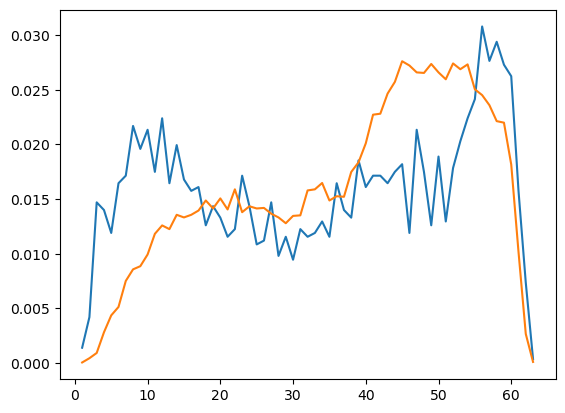

In [150]:
plt.plot(bins[1:], data_test[0])
plt.plot(bins[1:], data_test[4])

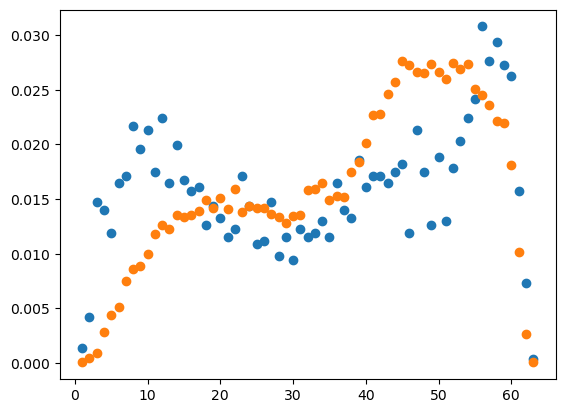

In [152]:
plt.scatter(bins[1:], data_test[0])
plt.scatter(bins[1:], data_test[4])

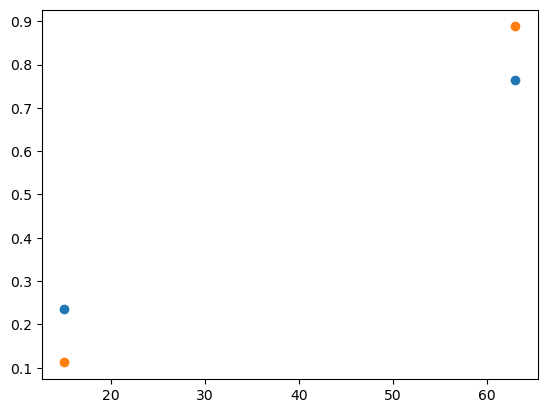

In [154]:
new_bins = [0, 15, 63]
data_bins = np.column_stack([data_test[:, new_bins[i]:new_bins[i+1]].sum(axis=1) for i in range(len(new_bins) - 1)])
plt.scatter(new_bins[1:], data_bins[0])
plt.scatter(new_bins[1:], data_bins[4])

In [169]:
x

array([ 7.5, 39. ])

(0.0, 63.0)

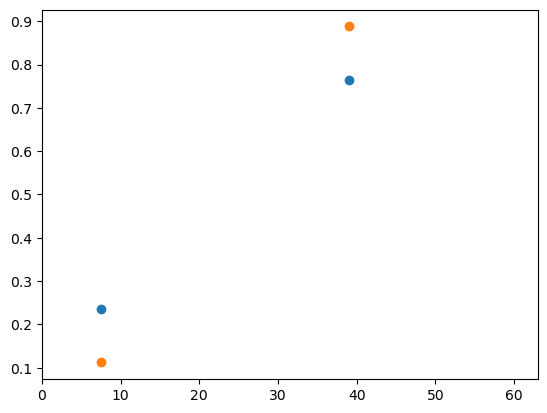

In [171]:
new_bins = [0, 15, 63]
data_bins = np.column_stack([data_test[:, new_bins[i]:new_bins[i+1]].sum(axis=1) for i in range(len(new_bins) - 1)])
x = np.diff(new_bins)/2 + new_bins[:-1]
plt.scatter(x, data_bins[0])
plt.scatter(x, data_bins[4])
plt.xlim([0, 63])

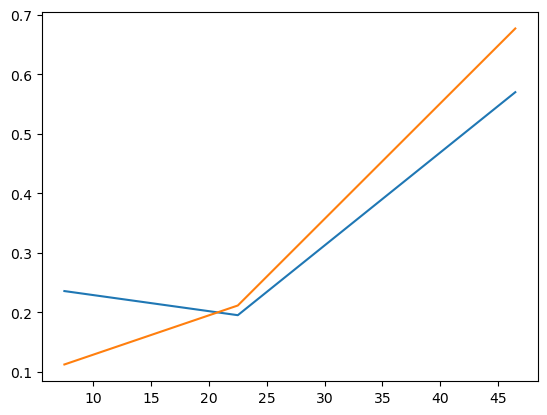

In [167]:
new_bins = [0, 15, 30, 63]
data_bins = np.column_stack([data_test[:, new_bins[i]:new_bins[i+1]].sum(axis=1) for i in range(len(new_bins) - 1)])
x = np.diff(new_bins)/2 + new_bins[:-1]
plt.plot(x, data_bins[0])
plt.plot(x, data_bins[4])

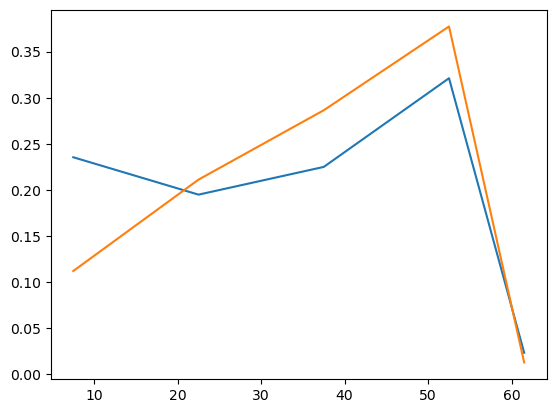

In [166]:
new_bins = [*range(0,63,15)] + [63]
data_bins = np.column_stack([data_test[:, new_bins[i]:new_bins[i+1]].sum(axis=1) for i in range(len(new_bins) - 1)])
x = np.diff(new_bins)/2 + new_bins[:-1]
plt.plot(x, data_bins[0])
plt.plot(x, data_bins[4])

In [165]:
np.diff(new_bins)/2 + new_bins[:-1]

array([ 2.5,  7.5, 12.5, 17.5, 22.5, 27.5, 32.5, 37.5, 42.5, 47.5, 52.5,
       57.5, 61.5])

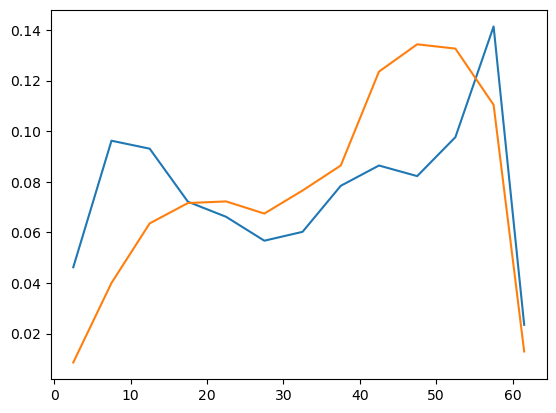

In [172]:
new_bins = [*range(0,63,5)] + [63]
data_bins = np.column_stack([data_test[:, new_bins[i]:new_bins[i+1]].sum(axis=1) for i in range(len(new_bins) - 1)])
x = np.diff(new_bins)/2 + new_bins[:-1]
plt.plot(x, data_bins[0])
plt.plot(x, data_bins[4])

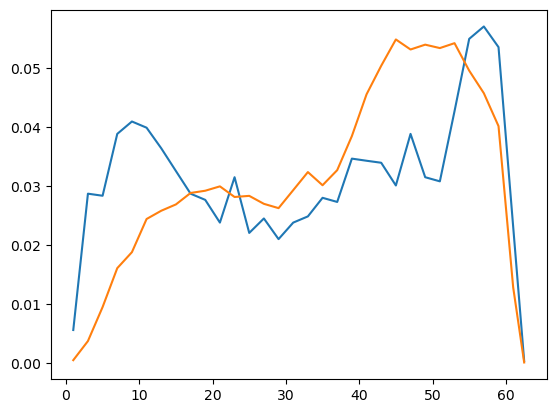

In [173]:
new_bins = [*range(0,63,2)] + [63]
data_bins = np.column_stack([data_test[:, new_bins[i]:new_bins[i+1]].sum(axis=1) for i in range(len(new_bins) - 1)])
x = np.diff(new_bins)/2 + new_bins[:-1]
plt.plot(x, data_bins[0])
plt.plot(x, data_bins[4])

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 63]
(223, 32)
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1.]


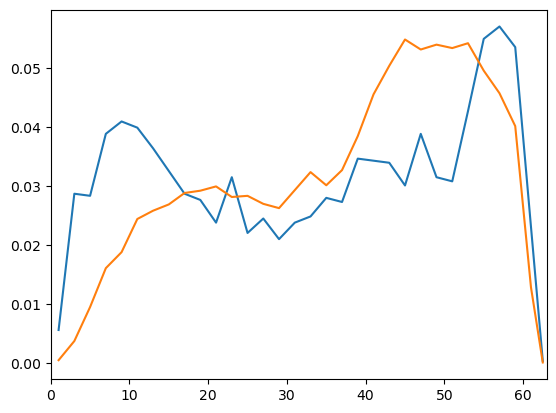

In [199]:
new_bins = [*range(0,63,2)] + [63]
#new_bins = [0, 15, 63]
data_bins = np.column_stack([data_test[:, new_bins[i]:new_bins[i+1]].sum(axis=1) for i in range(len(new_bins) - 1)])
print(new_bins)
print(data_bins.shape)
print(data_bins.sum(axis=1).round(5))
np.savetxt('Data_32bins.txt', data_bins, fmt='%.7f')

x = np.diff(new_bins)/2 + new_bins[:-1]
plt.plot(x, data_bins[0])
plt.plot(x, data_bins[4])
plt.xlim([0, 63])
plt.show()

In [200]:
np.loadtxt('Data_32bins.txt', dtype='float').sum(axis=1).round(5)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1.])

In [201]:
from matgen import matutils

In [212]:
new_bins = [*range(0,63,1)] + [63]
print(matutils.mackenzie_pmf(np.array(new_bins)))
np.savetxt('Testdata_ref.txt', [matutils.mackenzie_pmf(np.array(new_bins))], fmt='%.5f')

[1.000e-05 4.000e-05 1.300e-04 2.500e-04 4.200e-04 6.100e-04 8.600e-04
 1.140e-03 1.470e-03 1.830e-03 2.230e-03 2.680e-03 3.160e-03 3.690e-03
 4.250e-03 4.850e-03 5.490e-03 6.170e-03 6.900e-03 7.650e-03 8.440e-03
 9.280e-03 1.015e-02 1.106e-02 1.201e-02 1.299e-02 1.401e-02 1.506e-02
 1.616e-02 1.729e-02 1.845e-02 1.965e-02 2.088e-02 2.215e-02 2.346e-02
 2.478e-02 2.616e-02 2.755e-02 2.899e-02 3.045e-02 3.194e-02 3.348e-02
 3.503e-02 3.662e-02 3.823e-02 3.842e-02 3.707e-02 3.564e-02 3.412e-02
 3.251e-02 3.079e-02 2.900e-02 2.712e-02 2.513e-02 2.307e-02 2.092e-02
 1.868e-02 1.634e-02 1.394e-02 1.143e-02 6.220e-03 1.500e-03 0.000e+00]


In [204]:
new_bins = [0, 15, 63]
matutils.mackenzie_pmf(np.array(new_bins))

array([0.02277, 0.97723])

In [213]:
0.00001 + 0.00004 + 0.00013 + 0.00025 + 0.00042 + 0.00061 + 0.00086 + 0.00114 + 0.00147 + 0.00183 + 0.00223 + 0.00268 + 0.00316 + 0.00369 + 0.00425

0.022770000000000002